# Proyecto individual DA

- ##  Accidentes Aereos


In [1]:
import pandas as pd
import numpy as np



- ### Carga de datos

In [2]:
acc_av= pd.read_csv('AccidentesAviones.csv')


- # Comienzo de analisís exploratorio

- Comenzare a ver la información de mis columnas, revisar nulos y faltantes, tambien datos arroneos y conteo de repetidos antes de comenzar las primeras relaciones

In [3]:
acc_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [4]:
acc_av.rename(columns={'HORA declarada': 'hora declarada',
                       'OperadOR' : 'operador',
                       'flight_no': 'N°_Vuelo',
                       'Ruta' : 'lugar_accidente',
                       'route' : 'despego',
                       'ac_type' : 'tipo_aeronave',
                       'registration' : 'registro',
                       'cn_ln' : 'iden_uni_aeronave',
                       'all_aboard' : 'total_abordo',
                       'PASAJEROS A BORDO' : 'pasajeros_a_bordo',
                       'crew_aboard' : 'tripulantes_a_bordo',
                       'passenger_fatalities' : 'pasajeros_fallecidos',
                       'crew_fatalities' : 'tripulantes_fallecidos',
                       'ground' : 'pers_afec_tierra',
                       'summary' : 'descripcion'

                       
                       
                       }, inplace= True)

In [5]:
acc_av.isna().sum()

Unnamed: 0                0
fecha                     0
hora declarada            0
lugar_accidente           0
operador                  0
N°_Vuelo                  0
despego                   1
tipo_aeronave             0
registro                  0
iden_uni_aeronave         0
total_abordo              0
pasajeros_a_bordo         0
tripulantes_a_bordo       0
cantidad de fallecidos    0
pasajeros_fallecidos      0
tripulantes_fallecidos    0
pers_afec_tierra          0
descripcion               0
dtype: int64

In [6]:
acc_av = acc_av.drop('Unnamed: 0',axis= 1)

In [7]:
acc_av

,fecha,hora declarada,lugar_accidente,operador,N°_Vuelo,despego,tipo_aeronave,registro,iden_uni_aeronave,total_abordo,pasajeros_a_bordo,tripulantes_a_bordo,cantidad de fallecidos,pasajeros_fallecidos,tripulantes_fallecidos,pers_afec_tierra,descripcion
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [8]:
acc_av['pasajeros_a_bordo'].value_counts()

pasajeros_a_bordo
0      869
?      221
4      170
2      162
5      140
      ... 
172      1
509      1
191      1
307      1
184      1
Name: count, Length: 235, dtype: int64

- A simple vista al abrir mi df se ve varias repeticiones del dato '?', para tener un número certero de las veces que aparece en cada columa voy a realizar una sentencia for para las columnas

In [9]:
#.applymap() para aplicar la función a cada elemento del df
#lambda para verificar si un elemento es igual a '?'
count_colum =(acc_av.applymap(lambda x :x == '?')).sum()

#Muestro conteos por columna
for columna, conteo in count_colum.items():
    print (f'En {columna} se repite : {conteo}')

En fecha se repite : 0
En hora declarada se repite : 1504
En lugar_accidente se repite : 5
En operador se repite : 10
En N°_Vuelo se repite : 3682
En despego se repite : 762
En tipo_aeronave se repite : 13
En registro se repite : 272
En iden_uni_aeronave se repite : 667
En total_abordo se repite : 17
En pasajeros_a_bordo se repite : 221
En tripulantes_a_bordo se repite : 219
En cantidad de fallecidos se repite : 8
En pasajeros_fallecidos se repite : 235
En tripulantes_fallecidos se repite : 235
En pers_afec_tierra se repite : 44
En descripcion se repite : 59


Decido borrar la columna de n°_vuelo dado que la mayoría de sus datos son nulos practicamente dado que se puede apreciar que casi el 70% de sus datos son '?'

In [10]:
acc_av = acc_av.drop('N°_Vuelo', axis= 1)

- Luego de cargar los datos, comienzo a pasar las columnas a type que lo necesito para el EDA, principalmente sacando datos que pueden devolver un analisís erroneo

Primero voy a manipular la columna de fecha y luego la de hora

In [11]:
acc_av['fecha'] = pd.to_datetime(acc_av['fecha'], errors= 'coerce')

In [12]:
acc_av['hora declarada'] = acc_av['hora declarada'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [13]:
# Función para convertir los valores de la columna "time" a tipo datetime.time
def convertir_a_tiempo(time_str):
    try:
        return pd.to_datetime(time_str, format='%H:%M:%S').time()
    except ValueError:
        try:
            # Intenta con un formato alternativo sin segundos
            return pd.to_datetime(time_str, format='%H:%M').time()
        except ValueError:
            return None  # Si no se puede convertir, retorna None

In [14]:
# Aplica la función de conversión a la columna "time"
acc_av['hora declarada'] = acc_av['hora declarada'].apply(convertir_a_tiempo)

Ahora voy por las columnas que quiero en entero.

In [15]:
acc_av['total_abordo'] = pd.to_numeric(acc_av['total_abordo'], errors= 'coerce').astype(float).astype('Int64')

In [16]:
acc_av['pasajeros_a_bordo'] = pd.to_numeric(acc_av['pasajeros_a_bordo'], errors= 'coerce').astype(float).astype('Int64')

In [17]:
acc_av['tripulantes_a_bordo'] = pd.to_numeric(acc_av['tripulantes_a_bordo'], errors= 'coerce').astype(float).astype('Int64')

In [18]:
acc_av['cantidad de fallecidos'] = pd.to_numeric(acc_av['cantidad de fallecidos'], errors= 'coerce').astype(float).astype('Int64')

In [19]:
acc_av['pasajeros_fallecidos'] = pd.to_numeric(acc_av['pasajeros_fallecidos'], errors= 'coerce').astype(float).astype('Int64')

In [20]:
acc_av['tripulantes_fallecidos'] = pd.to_numeric(acc_av['tripulantes_fallecidos'], errors= 'coerce').astype(float).astype('Int64')

In [21]:
acc_av['pers_afec_tierra'] = pd.to_numeric(acc_av['pers_afec_tierra'], errors= 'coerce').astype(float).astype('Int64')

- Voy a cambiar los ultimos '?' a vacio

In [22]:
acc_av = acc_av.replace('?', np.nan )

- Decido agregar una columna con solo el formato de año para un mejor manejo en mis variables

In [23]:
acc_av['anio'] = acc_av['fecha'].dt.strftime('%Y')

In [24]:
acc_av['anio'] = pd.to_numeric(acc_av['anio'], errors= 'coerce').astype(float).astype('Int64')

- contolo la información de mi df despues de manipularlo y suma de null

In [25]:
acc_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora declarada          3457 non-null   object        
 2   lugar_accidente         5003 non-null   object        
 3   operador                4998 non-null   object        
 4   despego                 4245 non-null   object        
 5   tipo_aeronave           4995 non-null   object        
 6   registro                4736 non-null   object        
 7   iden_uni_aeronave       4341 non-null   object        
 8   total_abordo            4991 non-null   Int64         
 9   pasajeros_a_bordo       4787 non-null   Int64         
 10  tripulantes_a_bordo     4789 non-null   Int64         
 11  cantidad de fallecidos  5000 non-null   Int64         
 12  pasajeros_fallecidos    4773 non-null   Int64   

In [26]:
acc_av.isna().sum()

fecha                        0
hora declarada            1551
lugar_accidente              5
operador                    10
despego                    763
tipo_aeronave               13
registro                   272
iden_uni_aeronave          667
total_abordo                17
pasajeros_a_bordo          221
tripulantes_a_bordo        219
cantidad de fallecidos       8
pasajeros_fallecidos       235
tripulantes_fallecidos     235
pers_afec_tierra            44
descripcion                 59
anio                         0
dtype: int64

- Valores atipicos o outliers

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Columnas sin Nat
df = acc_av[['total_abordo', 'pasajeros_a_bordo', 'tripulantes_a_bordo', 'cantidad de fallecidos', 'pasajeros_fallecidos','tripulantes_fallecidos']].fillna(0)

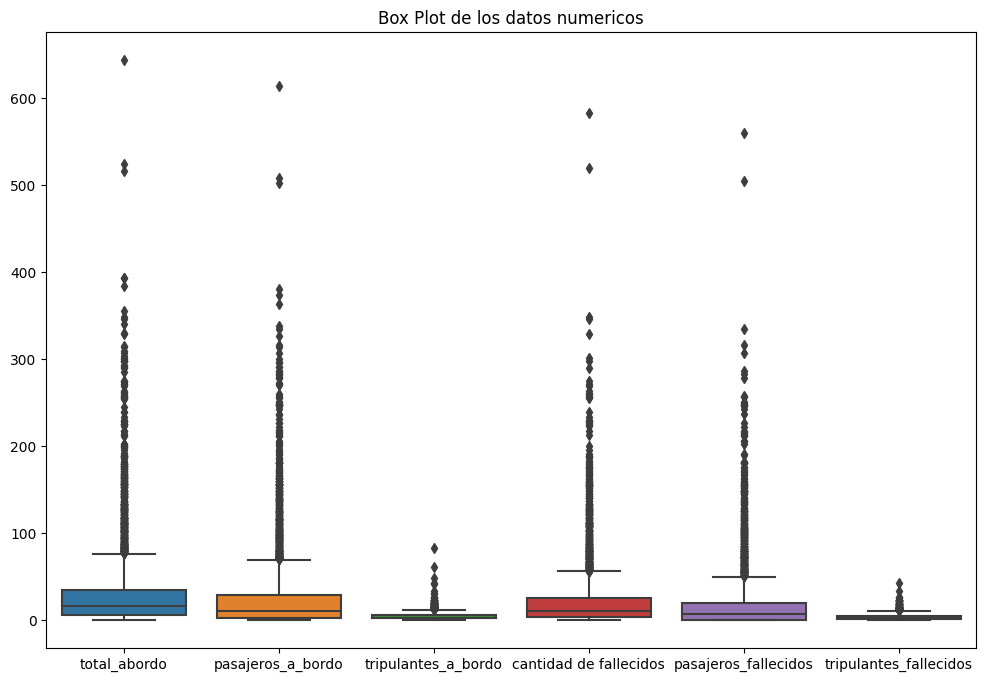

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title('Box Plot de los datos numericos')
plt.show()

- cantidad de filas duplicadas

In [30]:
duplicados = acc_av.duplicated(keep=False).sum()
print('Cantidad de filas duplicadas:', duplicados)
acc_av.shape

Cantidad de filas duplicadas: 0


(5008, 17)

- Valores null por cada columna

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


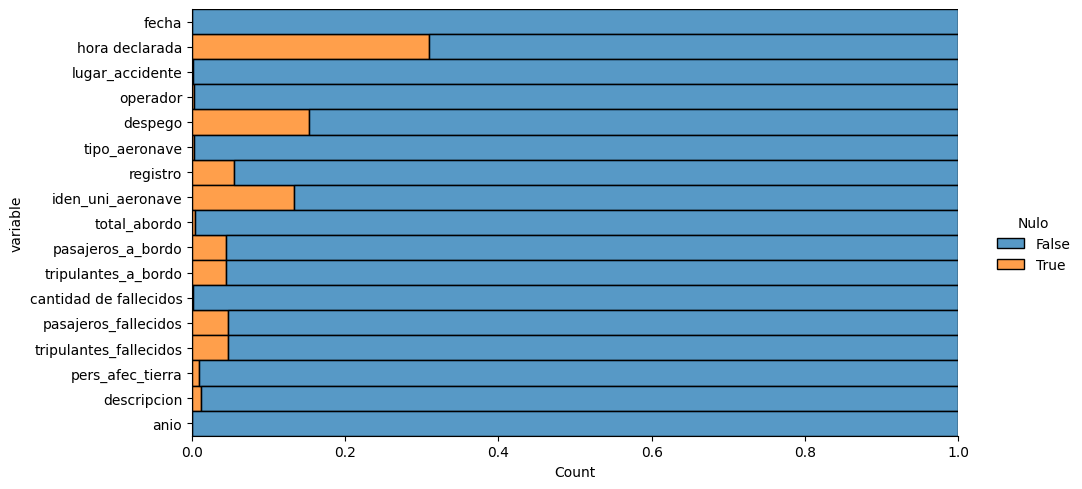

In [31]:
missing_data = acc_av.isnull().stack().reset_index().rename(columns={"level_1": "variable", 0: "Nulo"})
sns.displot(data=missing_data, y="variable", hue="Nulo", multiple="fill", aspect=2)

- ### Analisís General

- Categoricas

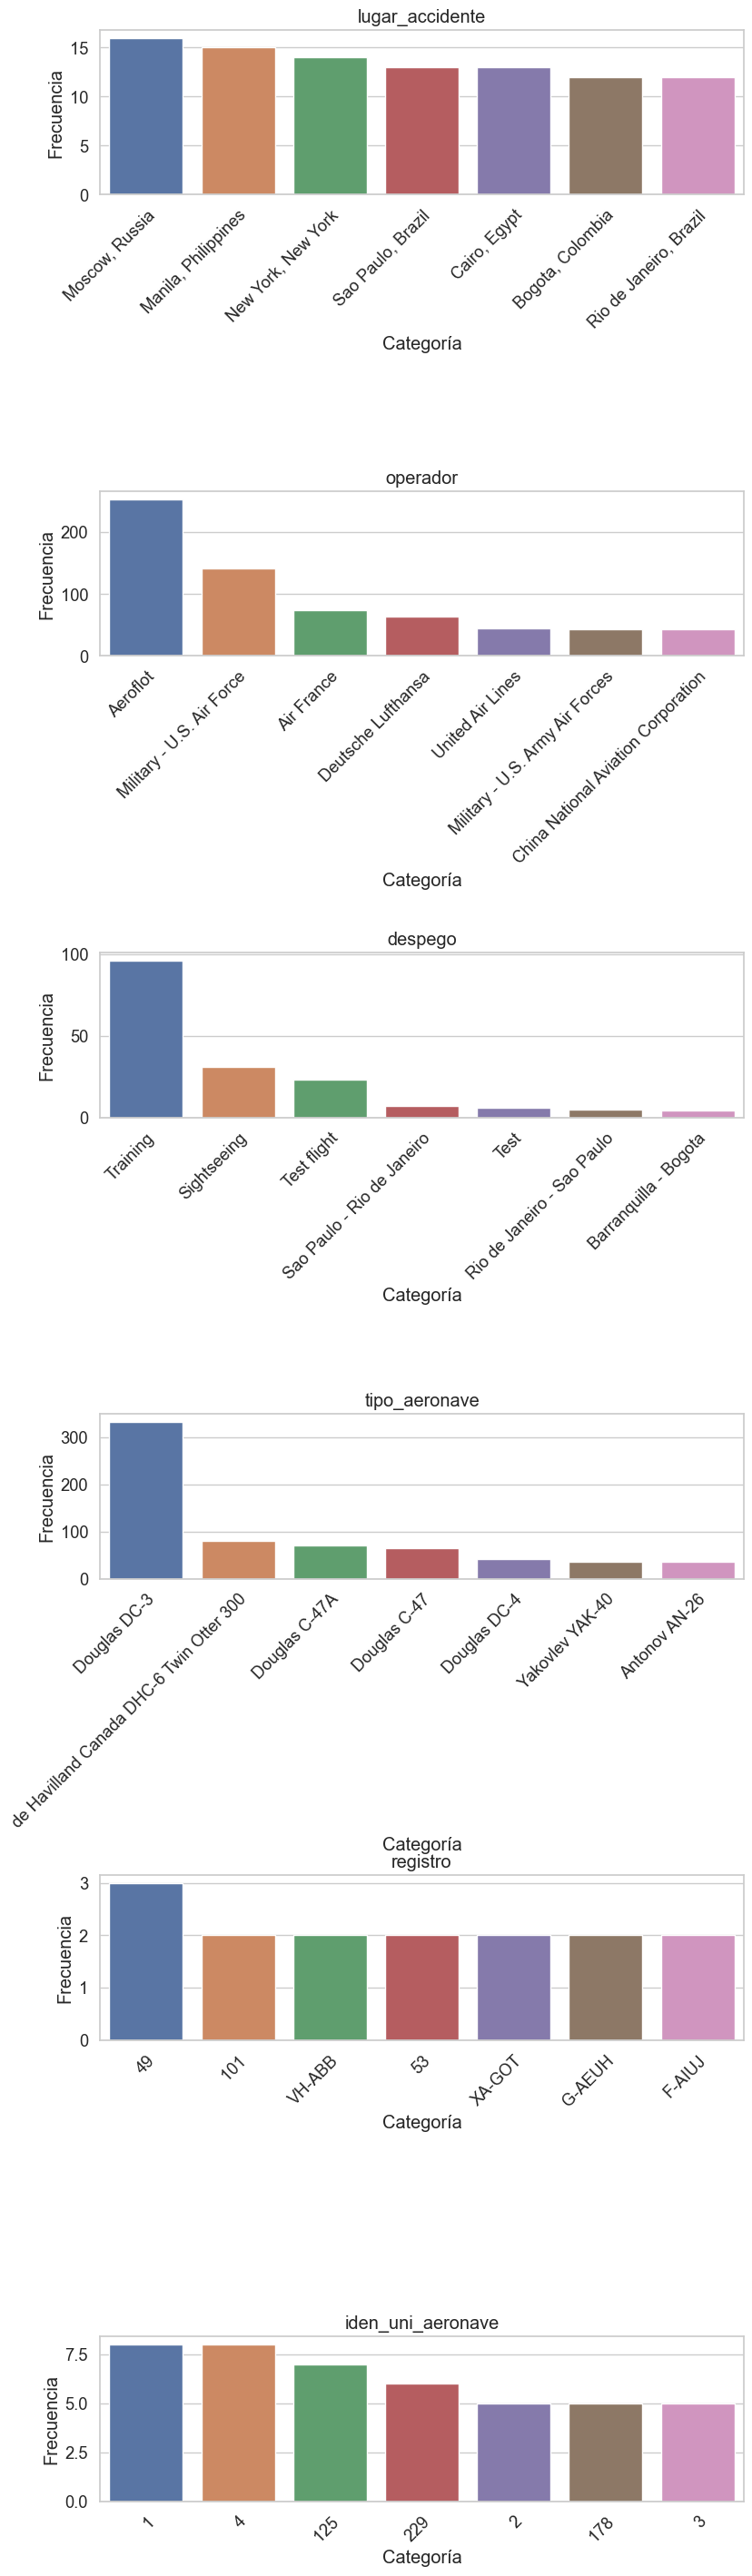

In [32]:
# Variables categóricas que deseo analizar
categorical_variables = ['lugar_accidente', 'operador','despego', 'tipo_aeronave','registro' , 'iden_uni_aeronave']

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Ajustar tamaño de la figura
fig, axs = plt.subplots(len(categorical_variables), 1, figsize=(10, len(categorical_variables)*5))
fig.tight_layout(pad=6)

# Generar gráficos univariados para cada variable
for i, variable in enumerate(categorical_variables):
    # Seleccionar el eje correspondiente
    ax = axs[i]
    
    # Contar la frecuencia de cada categoría y ordenarlas
    category_counts = acc_av[variable].value_counts().sort_values(ascending=False)
    
    # Seleccionar los 7 valores más frecuentes
    top_categories = category_counts.head(7)
    
    # Graficar barras de frecuencia con Seaborn
    sns.barplot(x=top_categories.index, y=top_categories.values, ax=ax)
    ax.set_title(variable)
    ax.set_xlabel('Categoría')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation_mode='anchor', ha='right')  # Rotar y alinear los ticks del eje x

# Ajustar el espaciado entre los subplots
plt.subplots_adjust(hspace=1.8)

# Mostrar el subplot
plt.show()

- Numérica

In [33]:
# En este caso agrego mi dataframe a otra variable para no perjudicar mi transformación principal
x=acc_av

In [34]:
siNan = ['total_abordo','pasajeros_a_bordo','tripulantes_a_bordo','cantidad de fallecidos','pasajeros_fallecidos','tripulantes_fallecidos','anio']
x[siNan] = x [siNan].fillna(0)

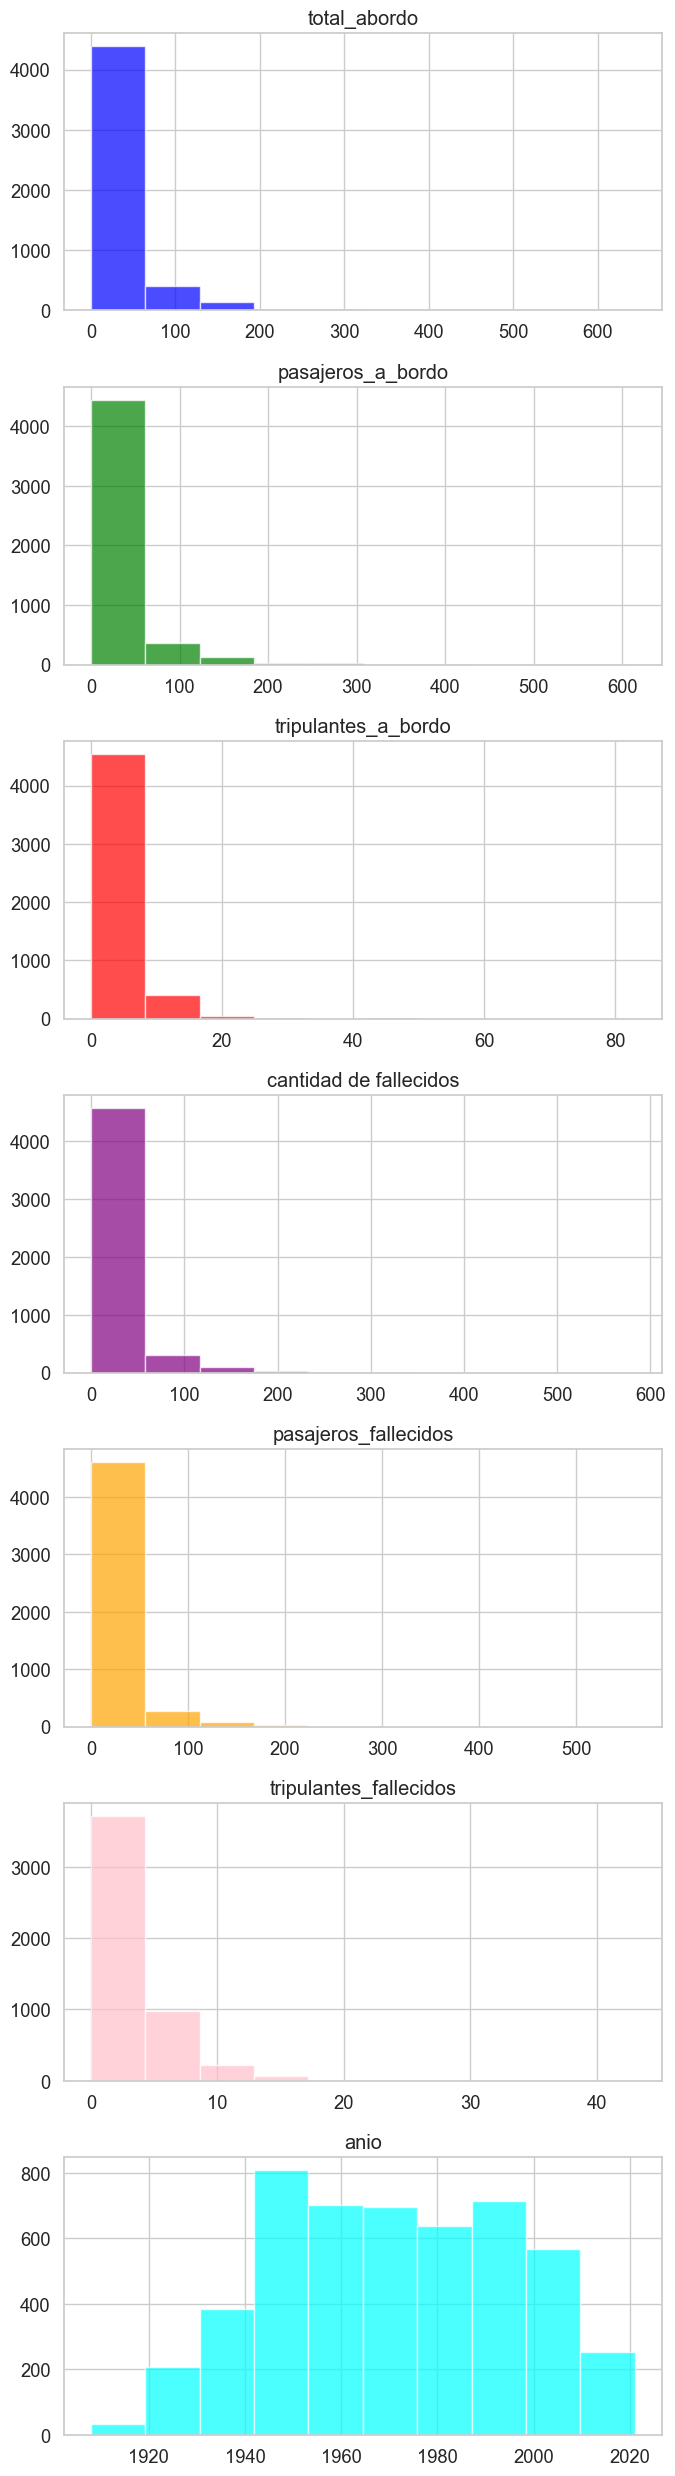

In [35]:
# Crear un subplot de 1x7
fig, axes = plt.subplots(7, 1, figsize=(7, 25))

# Seleccionar las columnas de datos que deseas graficar
columnas = ['total_abordo','pasajeros_a_bordo','tripulantes_a_bordo','cantidad de fallecidos','pasajeros_fallecidos','tripulantes_fallecidos','anio']

# Colores para los histogramas
colores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan']

# Títulos de los histogramas
titulos = ['total_abordo','pasajeros_a_bordo','tripulantes_a_bordo','cantidad de fallecidos','pasajeros_fallecidos','tripulantes_fallecidos','anio']

for i, columna in enumerate(columnas):
    data = x[columna]

    # Graficar histograma en el subplot correspondiente
    axes[i].hist(data, bins=10, color=colores[i], alpha=0.7)
    axes[i].set_title(titulos[i])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


-Análisis Bivariado

- Comparación de lugar de accidente y cantidad de fallecidos

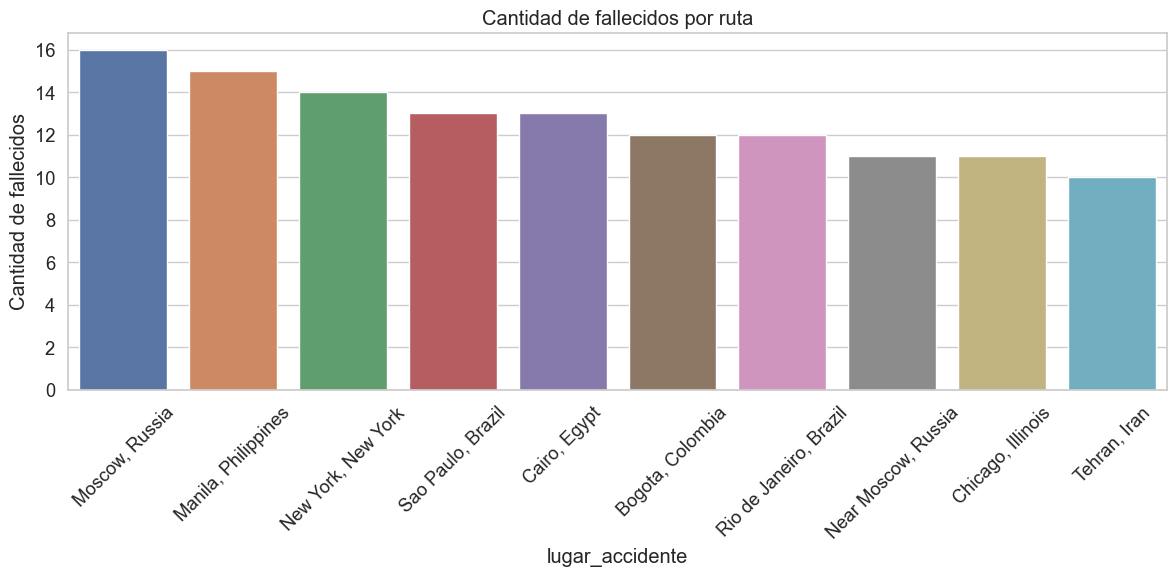

In [36]:
# Gráfico de barras: Comparación entre lugar accidente (Top 10) y Cantidad de Fallecidos

# Filtrar columnas relevantes
df_filtered = x[['lugar_accidente', 'cantidad de fallecidos']]


# Obtener las 10 rutas principales por frecuencia de datos
top_10_rutas = df_filtered['lugar_accidente'].value_counts().sort_values(ascending=False).head(10).index

# Filtrar el DataFrame solo para las 10 rutas principales
df_top_10_rutas = df_filtered[df_filtered['lugar_accidente'].isin(top_10_rutas)]

# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar barras de frecuencia de datos por ruta (solo las 10 principales)
sns.countplot(x='lugar_accidente', data=df_top_10_rutas, ax=ax, order=top_10_rutas)

# Configurar etiquetas y título
ax.set_title('Cantidad de fallecidos por ruta')
ax.set_xlabel('lugar_accidente')
ax.set_ylabel('Cantidad de fallecidos')

# Rotar y ajustar los ticks del eje x
ax.tick_params(axis='x', rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Comparación entre cantidad de pasajeros y cantidad de fallecidos

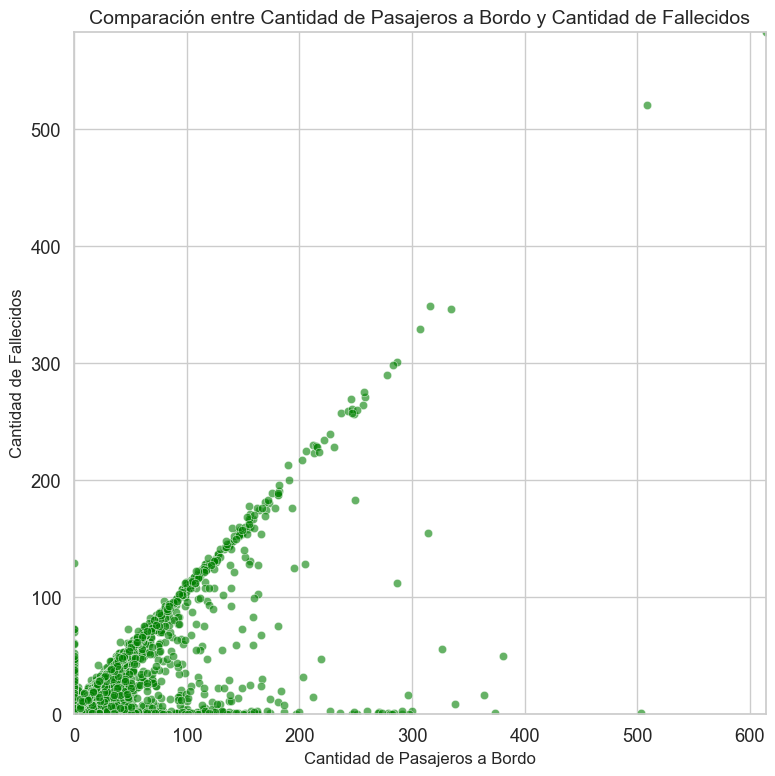

In [37]:
# Filtrar columnas relevantes
df_filtered = x[['pasajeros_a_bordo', 'cantidad de fallecidos']]


# Configuración de estilo de Seaborn
sns.set(style="whitegrid", font_scale=1.2)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 8))

# Graficar dispersión de cantidad de fallecidos por cantidad de pasajeros a bordo
sns.scatterplot(x='pasajeros_a_bordo', y='cantidad de fallecidos', data=df_filtered, ax=ax, alpha=0.6, color='green')

# Configurar etiquetas y título
ax.set_xlabel('Cantidad de Pasajeros a Bordo', fontsize=12)
ax.set_ylabel('Cantidad de Fallecidos', fontsize=12)
ax.set_title('Comparación entre Cantidad de Pasajeros a Bordo y Cantidad de Fallecidos', fontsize=14)

# Ajustar límites de los ejes
ax.set_xlim(0, df_filtered['pasajeros_a_bordo'].max())
ax.set_ylim(0, df_filtered['cantidad de fallecidos'].max())

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Comparacion de tripulantes fallecidos y cantidad de fallecidos

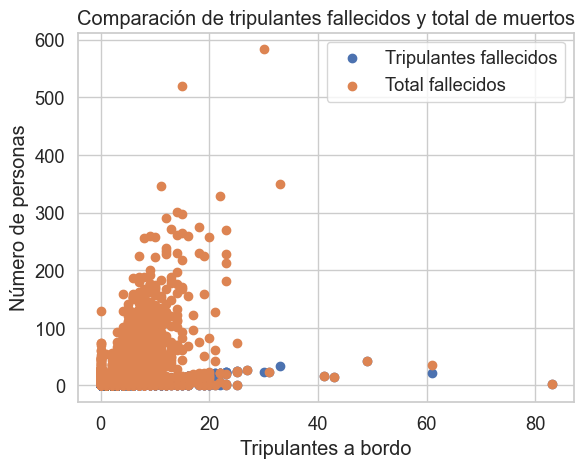

In [38]:
# Crea el gráfico de dispersión
plt.scatter(x["tripulantes_a_bordo"], x["tripulantes_fallecidos"], label="Tripulantes fallecidos")
plt.scatter(x["tripulantes_a_bordo"], x["cantidad de fallecidos"], label="Total fallecidos")

# Agrega títulos y etiquetas a los ejes
plt.title("Comparación de tripulantes fallecidos y total de muertos")
plt.xlabel("Tripulantes a bordo")
plt.ylabel("Número de personas")

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()